# Practica 2

**Objetivo:** A partir del [corpus proporcionado](./../99_corpus/corpusML.txt) realizar un modelo del lenguaje neuronal con base en la arquitectura propuesta por Bengio (2003).

In [1]:
from re import sub
from unicodedata import normalize
from nltk.stem.snowball import SpanishStemmer
from sklearn.model_selection import train_test_split
from itertools import chain
from collections import Counter,defaultdict
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

# Definimos funcion de apoyo para imprimir ejemplos de los corpus
def ejemplos(msg, collection, n_elements):
    print(msg)
    for element in collection[:n_elements]:
        print(element)

## 1. Limpiar los textos y aplicar stemming a las palabras.

In [2]:
# Abrir el documento
document = './../99_corpus/corpusML.txt'
text = open(document,'r',encoding='utf-8').read()

In [3]:
# Limpiamos el documento
text_clean = ""
lines = []

for line in text.split("\n"):
    # Eliminamos caracteres compuestos y pasamos a minusculas
    line = normalize('NFKC', line).lower()
    # Eliminamos extensiones y numeros
    line = sub(r"\\.*|{.*}|\\|\[.*\]|[!-@[-`{-~]", ' ', line)
    # Eliminamos signos de puntuacion
    line = sub(r"[^\w]", " ", line)
    # Eliminamos saltos de linea
    line = " ".join(line.split())
    # Si la linea no esta vacia la añadimos al texto limpio
    if line:
        lines.append(line)
        
text_clean += " ".join(lines)
text_clean = text_clean.split()

ejemplos("### Lineas de ejemplo ###\n", lines, 5)

### Lineas de ejemplo ###

comencé a trabajar y me pegaron me maltrataron con chicote
mis patrones me pegaron porque no me quería apurar porque era flojo
por eso me habían pegado
cuando me pegaban ya entonces me quitaba
pues entonces no quise trabajar


In [4]:
# Aplicamos Stemming a los tokens limpios

# Debido a que el corpus se encuentra en español, utilizaremos el stemmer de NLTK para español.
stemmer = SpanishStemmer()
stems = []
for line in lines:
    stems.append([stemmer.stem(word) for word in line.split(" ")])
    
ejemplos("### Lineas de ejemplo ###\n", stems, 5)

### Lineas de ejemplo ###

['comenc', 'a', 'trabaj', 'y', 'me', 'peg', 'me', 'maltrat', 'con', 'chicot']
['mis', 'patron', 'me', 'peg', 'porqu', 'no', 'me', 'quer', 'apur', 'porqu', 'era', 'floj']
['por', 'eso', 'me', 'hab', 'peg']
['cuand', 'me', 'peg', 'ya', 'entonc', 'me', 'quit']
['pues', 'entonc', 'no', 'quis', 'trabaj']


In [5]:
# Separación del corpus en prueba (70%) y evaluación (30%)
train_corpus, eval_corpus = train_test_split(stems, test_size=0.3)

print("### Corpus de entrenamiento ###")
print("\nTamaño del corpus de entrenamiento:",len(train_corpus), " lineas")
ejemplos("\nLineas de ejemplo", train_corpus, 5)

print("\n### Corpus de evaluacion ###")
print("\nTamaño del corpus de evaluación:", len(eval_corpus), " lineas")
ejemplos("\nLineas de ejemplo", eval_corpus, 5)

### Corpus de entrenamiento ###

Tamaño del corpus de entrenamiento: 751  lineas

Lineas de ejemplo
['se', 'le', 'termin', 'de', 'echar']
['las', 'odi', 'a', 'las', 'dos', 'a', 'tu', 'mam', 'y', 'a', 'ti']
['le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit']
['cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr']
['hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm']

### Corpus de evaluacion ###

Tamaño del corpus de evaluación: 323  lineas

Lineas de ejemplo
['no', 'quer', 'que', 'vin', 'y', 'que', 'me', 'vier']
['pues', 'primer', 'se', 'empiez', 'a', 'troz', 'un', 'molcajet', 'o', 'sea', 'se', 'emparej']
['per', 'cuand', 'estas', 'sol', 'los', 'niñ', 'no', 'te', 'entiend']
['si', 'no', 'me', 'hub', 'muert']
['y', 'pues', 'mi', 'padr', 'ten', 'vac']


## 2. Insertar símbolos de inicio y final de cadena.

In [6]:
# Definimos los simbolos
BOS = '<BOS>'
EOS = '<EOS>'
UNK = '<UNK>'

In [7]:
# Definamos una función para sustituir los hapax, esta funcion recibe un corpus
def replace_hapax(corpus):
    # Obtenemos las frecuencias de las palabras del corpus
    freqs = Counter( chain(*[' '.join(sent).split() for sent in corpus]) )

    # Sustituimos los hápax por UNK en las palabras con frecuencia = 1
    corpus_unk = []

    for line in corpus:
        new_line = []
        for word in line:
            # Si la frecuencia de la palabra = 1, es un hapáx
            if freqs[word] == 1:
                new_line.append(UNK)
            # Si no, añadimos la palabra original
            else:
                new_line.append(word)
        corpus_unk.append(new_line)
    return corpus_unk

In [8]:
# Sustituimos los hápax en los corpus

train_corpus_unk = []
train_corpus_unk = replace_hapax(train_corpus)
print("### Corpus de entrenamiento ###")
print("\nTamaño del corpus de entrenamiento:",len(train_corpus_unk), " lineas")
ejemplos("\nLineas de ejemplo del corpus de entrenamiento", train_corpus_unk, 5)

eval_corpus_unk = []
eval_corpus_unk = replace_hapax(eval_corpus)
print("\n### Corpus de evaluacion ###")
print("\nTamaño del corpus de evaluación:", len(eval_corpus_unk), " lineas")
ejemplos("\nLineas de ejemplo del corpus de evaluacion", eval_corpus_unk, 5)

### Corpus de entrenamiento ###

Tamaño del corpus de entrenamiento: 751  lineas

Lineas de ejemplo del corpus de entrenamiento
['se', 'le', 'termin', 'de', '<UNK>']
['las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>']
['le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit']
['cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr']
['hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm']

### Corpus de evaluacion ###

Tamaño del corpus de evaluación: 323  lineas

Lineas de ejemplo del corpus de evaluacion
['no', 'quer', 'que', 'vin', 'y', 'que', 'me', '<UNK>']
['pues', 'primer', 'se', 'empiez', 'a', 'troz', 'un', 'molcajet', 'o', 'sea', 'se', 'emparej']
['per', 'cuand', 'estas', 'sol', 'los', 'niñ', 'no', 'te', 'entiend']
['si', 'no', 'me', 'hub', '<UNK>']
['y', 'pues', 'mi', 'padr', 'ten', 'vac']


In [9]:
# Definamos una función para insertar los BOS y EOS
def insert_simbols_of_sentence(corpus):
    corpus_w_simbols = [ [BOS] + line + [EOS] for line in corpus ]
    return corpus_w_simbols

In [10]:
# Insertamos BOS y EOS
train_corpus_w_simbols = []
train_corpus_w_simbols = insert_simbols_of_sentence(train_corpus_unk)
print("### Corpus de entrenamiento ###")
print("\nTamaño del corpus de entrenamiento:",len(train_corpus_w_simbols), " lineas")
ejemplos("\nLineas de ejemplo del corpus de entrenamiento", train_corpus_w_simbols, 5)

eval_corpus_w_simbols = []
eval_corpus_w_simbols = insert_simbols_of_sentence(eval_corpus_unk)
print("\n### Corpus de evaluacion ###")
print("\nTamaño del corpus de evaluacion:",len(eval_corpus_w_simbols), " lineas")
ejemplos("\nLineas de ejemplo del corpus de evaluacion", eval_corpus_w_simbols, 5)

### Corpus de entrenamiento ###

Tamaño del corpus de entrenamiento: 751  lineas

Lineas de ejemplo del corpus de entrenamiento
['<BOS>', 'se', 'le', 'termin', 'de', '<UNK>', '<EOS>']
['<BOS>', 'las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>', '<EOS>']
['<BOS>', 'le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit', '<EOS>']
['<BOS>', 'cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr', '<EOS>']
['<BOS>', 'hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm', '<EOS>']

### Corpus de evaluacion ###

Tamaño del corpus de evaluacion: 323  lineas

Lineas de ejemplo del corpus de evaluacion
['<BOS>', 'no', 'quer', 'que', 'vin', 'y', 'que', 'me', '<UNK>', '<EOS>']
['<BOS>', 'pues', 'primer', 'se', 'empiez', 'a', 'troz', 'un', 'molcajet', 'o', 'sea', 'se', 'emparej', '<EOS>']
['<BOS>', 'per', 'cuand', 'estas', 'sol', 'los', 'niñ', 'no', 'te', 'entiend', '<EOS>']
['<BOS>', 'si', 'no', 'me', 'hub', '<UNK>

## 3. Obtener los bigramas que aparecen en el texto (indexar numéricamente).

In [11]:
# Definamos una función para indexar numericamente
def corpus2index(corpus):
    # Creamos un diccionario para los stems
    vocab = defaultdict()
    vocab.default_factory = lambda: len(vocab)

    # Creamos el corpus con sus indices
    corpus_ids = [[vocab[word] for word in line] for line in corpus]
    return corpus_ids, vocab

In [12]:
# Indexamos numericamente los stems

train_corpus_ids, train_vocab = corpus2index(train_corpus_w_simbols)
print("### Corpus de entrenamiento ###")
ejemplos("\nOraciones en corpus de entrenamiento", train_corpus_w_simbols, 5)
ejemplos("\nIndices en corpus de entrenamiento", train_corpus_ids, 5)

eval_corpus_ids, eval_vocab = corpus2index(eval_corpus_w_simbols)
print("\n### Corpus de evaluacion ###")
ejemplos("\nOraciones en corpus de evaluacion", eval_corpus_w_simbols, 5)
ejemplos("\nIndices en corpus de evaluacion", eval_corpus_ids, 5)

### Corpus de entrenamiento ###

Oraciones en corpus de entrenamiento
['<BOS>', 'se', 'le', 'termin', 'de', '<UNK>', '<EOS>']
['<BOS>', 'las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>', '<EOS>']
['<BOS>', 'le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit', '<EOS>']
['<BOS>', 'cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr', '<EOS>']
['<BOS>', 'hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm', '<EOS>']

Indices en corpus de entrenamiento
[0, 1, 2, 3, 4, 5, 6]
[0, 7, 5, 8, 7, 9, 8, 10, 5, 11, 8, 5, 6]
[0, 2, 12, 2, 13, 8, 14, 15, 16, 6]
[0, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 8, 28, 29, 6]
[0, 30, 2, 31, 32, 21, 2, 33, 34, 35, 36, 6]

### Corpus de evaluacion ###

Oraciones en corpus de evaluacion
['<BOS>', 'no', 'quer', 'que', 'vin', 'y', 'que', 'me', '<UNK>', '<EOS>']
['<BOS>', 'pues', 'primer', 'se', 'empiez', 'a', 'troz', 'un', 'molcajet', 'o', 'sea', 'se', 'emparej', '<EOS>']

In [13]:
# Definamos una función para crear los bigrama
def corpus2bigrams(corpus):
    bigrams = list(chain(*[zip(cad,cad[1:]) for cad in corpus]))
    return bigrams

In [14]:
# Obtencion de los bigramas
train_bigrams = []
train_bigrams = corpus2bigrams(train_corpus_ids)
print("### Corpus de entrenamiento ###")
print("\nNúmero de bigramas:", len(train_bigrams))
print("\nEjemplos de bigramas de entrenamiento\n", train_bigrams[:50])

eval_bigrams = []
eval_bigrams = corpus2bigrams(eval_corpus_ids)
print("\n### Corpus de evaluacion ###")
print("\nNúmero de bigramas:", len(eval_bigrams))
print("\nEjemplos de bigramas de evaluacion\n", train_bigrams[:50])

### Corpus de entrenamiento ###

Número de bigramas: 6858

Ejemplos de bigramas de entrenamiento
 [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (0, 7), (7, 5), (5, 8), (8, 7), (7, 9), (9, 8), (8, 10), (10, 5), (5, 11), (11, 8), (8, 5), (5, 6), (0, 2), (2, 12), (12, 2), (2, 13), (13, 8), (8, 14), (14, 15), (15, 16), (16, 6), (0, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 8), (8, 28), (28, 29), (29, 6), (0, 30), (30, 2), (2, 31), (31, 32), (32, 21), (21, 2), (2, 33), (33, 34)]

### Corpus de evaluacion ###

Número de bigramas: 3014

Ejemplos de bigramas de evaluacion
 [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (0, 7), (7, 5), (5, 8), (8, 7), (7, 9), (9, 8), (8, 10), (10, 5), (5, 11), (11, 8), (8, 5), (5, 6), (0, 2), (2, 12), (12, 2), (2, 13), (13, 8), (8, 14), (14, 15), (15, 16), (16, 6), (0, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 8), (8, 28),

## 4. Entrenar con los bigramas la red neuronal y obtener los valores para los hiperparámetros. Tomar de 100 unidades para la primera capa oculta (capa lineal) y 300 para la segunda capa oculta (capa con tanh).`

In [28]:
class Bengio:
    # Constructor del objeto
    def __init__(self, bigrams, T, d, m, n, N):
        self.bigrams = bigrams
        self.T = T    # Numero de iteraciones
        self.d = d    # Dimension de los embeddings
        self.m = m    # Numero de unidades en la capa oculta
        self.n = n    # Rango de aprendizaje
        self.N = N    # Tamaño del vocabulario
    
    # Inicializamos parametros del modelo
    def initialize_params(self):
        # Matriz de representacion lineal en la primera capa oculta, C ∈ R^(d×N)
        self.C = np.random.random((self.d, self.N))/np.sqrt(self.N)
        # Matriz de pesos en la segunda capa oculta, W ∈ R^(m×d)
        self.W = np.random.random((self.m, self.d))/np.sqrt(self.d)
        # Bias, b ∈ R^m
        self.b = np.random.random(self.m)
        # Matriz de pesos en la capa de salida, U ∈ R^(N×m)
        self.U = np.random.random((self.N, self.m))/np.sqrt(self.m)
        # Bias, c ∈ R^m
        self.c = np.random.random(self.N)
        # Riesgo
        self.R = []
        self.R_it = 0
    
    # Definimos los pasos de forward
    def forward(self, i_x):
        # Capa de embedding
        c_i = self.C[:,i_x]
        # Capa oculta
        h_i = np.tanh(np.dot(self.W, c_i) + self.b)
        # Capa de salida (Softmax)
        # -> Pre-activacion
        a_i = np.dot(self.U, h_i) + self.c
        # -> Activacion
        e_a = np.exp(a_i - a_i.max())
        p_wk_wi = e_a / e_a.sum()
        
        return (p_wk_wi, h_i)
    
    # Definimos la funcion de riesgo
    def risk(self, p_wk_wi, i_y):
        # Entropia cruzada
        self.R_it -= np.log(p_wk_wi[i_y].sum())
    
    # Definimos la funcion para guardar la entropia al final de la iteracion
    def saveRisk(self):
        self.R.append(self.R_it)
    
    # Definimios la funcion para obtener el historial de la entropia cruzada
    def getRisk(self):
        return self.R

    # Definimos los pasos de backward (backpropagation)
    def backward(self, i_y, p_wk_wi, h_i):
        # Capa de salida
        d_out = np.array(p_wk_wi, copy=True) 
        d_out[i_y] -= 1
        # Capa oculta
        d_h = (1 - (h_i*h_i)) * np.dot(d_out.T, self.U)
        # Capa de embedding
        d_c = np.dot(d_h.T, self.W)
        
        return (d_out, d_h, d_c)
    
    # Definimos la actualización de pesos (gradiente descendente)
    def updateWeights(self, d_out, h_i, d_h, d_c, i_x):
        # Capa de salida
        self.U -= self.n * np.outer(d_out, h_i)
        # Capa oculta
        self.W -= self.n * np.outer(d_h, self.C[:, i_x])
        self.c -= self.n * d_out
        #self.c -= self.n * d_h
        # Capa de embedding
        self.C[:, i_x] -=  self.n * d_c
        self.b -= self.n * d_h
        #self.b -= self.n * d_c
    
    # Definimos el entrenamiento
    def train(self):
        for it in range(0, self.T):
            self.R_it = 0
            for pair in self.bigrams:
                # Separamos el bigrama en la palabra y la clase
                i_x = pair[0]
                i_y = pair[1]
                # Forward
                p_wk_wi, h_i = self.forward(i_x)
                # Funcion de riesgo
                self.risk(p_wk_wi, i_y)
                # Backward
                d_out, d_h, d_c = self.backward(i_y, p_wk_wi, h_i)
                # Actualizacion de pesos
                self.updateWeights(d_out, h_i, d_h, d_c, i_x)
            # Guardamos el historial de la entropia cruzada
            self.saveRisk()
            print("Epoch: ", it, "\tEntropia cruzada: ", self.R_it)
        print("### Ha terminado el entrenamiento ###")

In [29]:
# Definimos hiperparametros de la red
T = 20    # Numero de iteraciones
d = 100    # Dimension de los embeddings
m = 300    # Numero de unidades en la capa oculta
n = 0.1    # Rango de aprendizaje
N = len(train_vocab) # Tamaño del vocabulario

print("Tamaño del vocabulario: ", N)

Tamaño del vocabulario:  503


In [31]:
# Creamos objeto del modelo y lo entrenamos
modelo = Bengio(train_bigrams, T, d, m, n, N)
modelo.initialize_params()
modelo.train()

Epoch:  0 	Entropia cruzada:  33612.10091542553
Epoch:  1 	Entropia cruzada:  30915.731793982683
Epoch:  2 	Entropia cruzada:  29682.621322058018
Epoch:  3 	Entropia cruzada:  28692.881200951877
Epoch:  4 	Entropia cruzada:  27901.74801299211
Epoch:  5 	Entropia cruzada:  27316.479410648095
Epoch:  6 	Entropia cruzada:  26845.51495728309
Epoch:  7 	Entropia cruzada:  26514.692340932408
Epoch:  8 	Entropia cruzada:  26270.500899125713
Epoch:  9 	Entropia cruzada:  26092.06287240499
Epoch:  10 	Entropia cruzada:  25996.083903343166
Epoch:  11 	Entropia cruzada:  25902.903239686842
Epoch:  12 	Entropia cruzada:  25882.44712891547
Epoch:  13 	Entropia cruzada:  25887.378884792404
Epoch:  14 	Entropia cruzada:  25901.014578045324
Epoch:  15 	Entropia cruzada:  25905.21610404721
Epoch:  16 	Entropia cruzada:  25894.452788284114
Epoch:  17 	Entropia cruzada:  25859.10515646662
Epoch:  18 	Entropia cruzada:  25837.09504636495
Epoch:  19 	Entropia cruzada:  26036.21485307261
### Ha terminado el

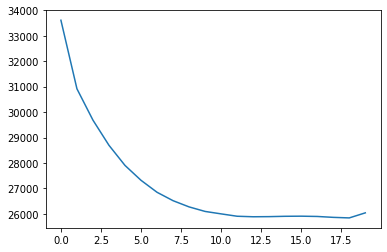

In [32]:
# Vemos como fue el desempeño del modelo
plt.plot(modelo.getRisk())
plt.show()

## 5. Obtener las matrices A y Π a partir de las salidas de la red neuronal (probabilidad Softmax).

In [34]:
# Modelo de lenguaje μ = (Σ,A,Π), 
# Σ es un conjunto de símbolos o vocabulario
# A = (ai j) = p(wj|wi) son las probabilidades de transicion de los bigramas
# Π = (πi) = p(wi) son las probabilidades iniciales.

#Numero de tipos sin contar las etiqeutas BOS y EOS
n_tipos = len(train_corpus_ids)-2

#La matriz A es de NxN+1, los renglones consideran EOS
A = np.zeros((n_tipos,n_tipos+1))

#Pi es del tamaño de los tipos
Pi = np.zeros(N)

## 6. Evaluar el modelo (con Entropía).

## 7. Calcular la probabilidad de las siguientes oraciones:
   - Nos bañamos con agua caliente
   - El animalito le olía la cabeza
   - Pascuala ordeñaba las vacas